In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_LineChart(result_f1):
    """
    绘制折线图，展示不同方法随任务推进的性能变化趋势
    
    参数：
    result_f1；字典，键为方法名称，值为数值列表，每个元素对应不同时间点的F1-Macro值

    配色；
    colors = ['#f57c6e', '#f2b56e', '#fbe79e', '#84c3b7', '#88d7da', '#71b8ed', '#b8aeea', '#f2a8da']
        
    """
    # 设置Times New Roman字体
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.unicode_minus'] = False
    
    # 获取数据长度并自动创建横坐标
    first_method = next(iter(result_f1.keys()))
    data_length = len(result_f1[first_method])
    slots = ['Initial'] + [f'slot {i}' for i in range(1, data_length)]
    
    # 创建图形 - 两个相等高度的子图，并调整子图之间的间距
    # 根据数据长度动态调整图的宽度
    fig_width = 10 + min(data_length - 5, 10)  # 基础宽度10，数据长于5时适当增加
    fig, axes = plt.subplots(2, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [1, 3], 'hspace': 0})
    ax_legend, ax_plot = axes
    
    # 为每个方法绘制曲线
    colors = ['#f57c6e', '#f2b56e', '#fbe79e', '#84c3b7', '#88d7da', '#71b8ed', '#b8aeea', '#f2a8da']
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']
    
    # 先在下半部分绘制曲线图
    for i, (method, scores) in enumerate(result_f1.items()):
        ax_plot.plot(slots, scores,
                 color=colors[i % len(colors)],
                 marker=markers[i % len(markers)],
                 linewidth=8,
                 markersize=25,
                 alpha=0.8,
                 label=method)
    
    # --- 配置下方的绘图区域 ---
    ax_plot.set_xlabel('Task', fontsize=40, fontfamily='Times New Roman')
    ax_plot.set_ylabel('F1-Macro (%)', fontsize=40, fontfamily='Times New Roman')
    ax_plot.grid(True, alpha=0.3)
    
    # 自动调整y轴范围，留出适当边距
    all_scores = [score for scores in result_f1.values() for score in scores]
    y_min, y_max = min(all_scores), max(all_scores)
    y_pad = (y_max - y_min) * 0.05  # 5%的边距
    ax_plot.set_ylim(y_min - y_pad, y_max + y_pad)
    
    # 根据数据长度调整x轴标签大小和旋转角度
    x_tick_fontsize = max(20, 40 - (data_length - 5) * 2)  # 数据越长，标签越小
    ax_plot.tick_params(axis='x', labelrotation=min(45, data_length * 5), labelsize=x_tick_fontsize)
    ax_plot.tick_params(axis='y', labelsize=40)
    
    for label in ax_plot.get_xticklabels() + ax_plot.get_yticklabels():
        label.set_fontname('Times New Roman')
    
 # --- 在上半部分手动创建图例 ---
    # 关闭上半部分的坐标轴
    ax_legend.set_xlim(0, 1)
    ax_legend.set_ylim(0, 1)
    ax_legend.axis('off')
    
    # 手动绘制图例项目
    methods = list(result_f1.keys())
    n_methods = len(methods)
    cols = 4  # 每行4个图例项
    rows = 2  # 2行
    
    for i, method in enumerate(methods):
        row = i // cols
        col = i % cols
    
        # 计算位置
        x_pos = 0.12 + col * 0.2  # 每个图例项占0.2的宽度
        y_pos = 0.85 - row * 0.4  # 两行，间距0.4
    
        # 绘制线条和标记
        ax_legend.plot([x_pos, x_pos + 0.05], [y_pos, y_pos],
                       color=colors[i], marker=markers[i], linewidth=5,
                       markersize=15, markeredgewidth=0)
    
        # 添加文字标签
        ax_legend.text(x_pos + 0.07, y_pos, method,
                       fontsize=30, fontfamily='Times New Roman',
                       verticalalignment='center')
    
    # 调整整体布局
    fig.tight_layout()
    
    # 保存为单个PDF文件
    fig.savefig('LineChart.pdf', format='pdf', dpi=300, bbox_inches='tight')
    
    # 显示图形
    plt.show()

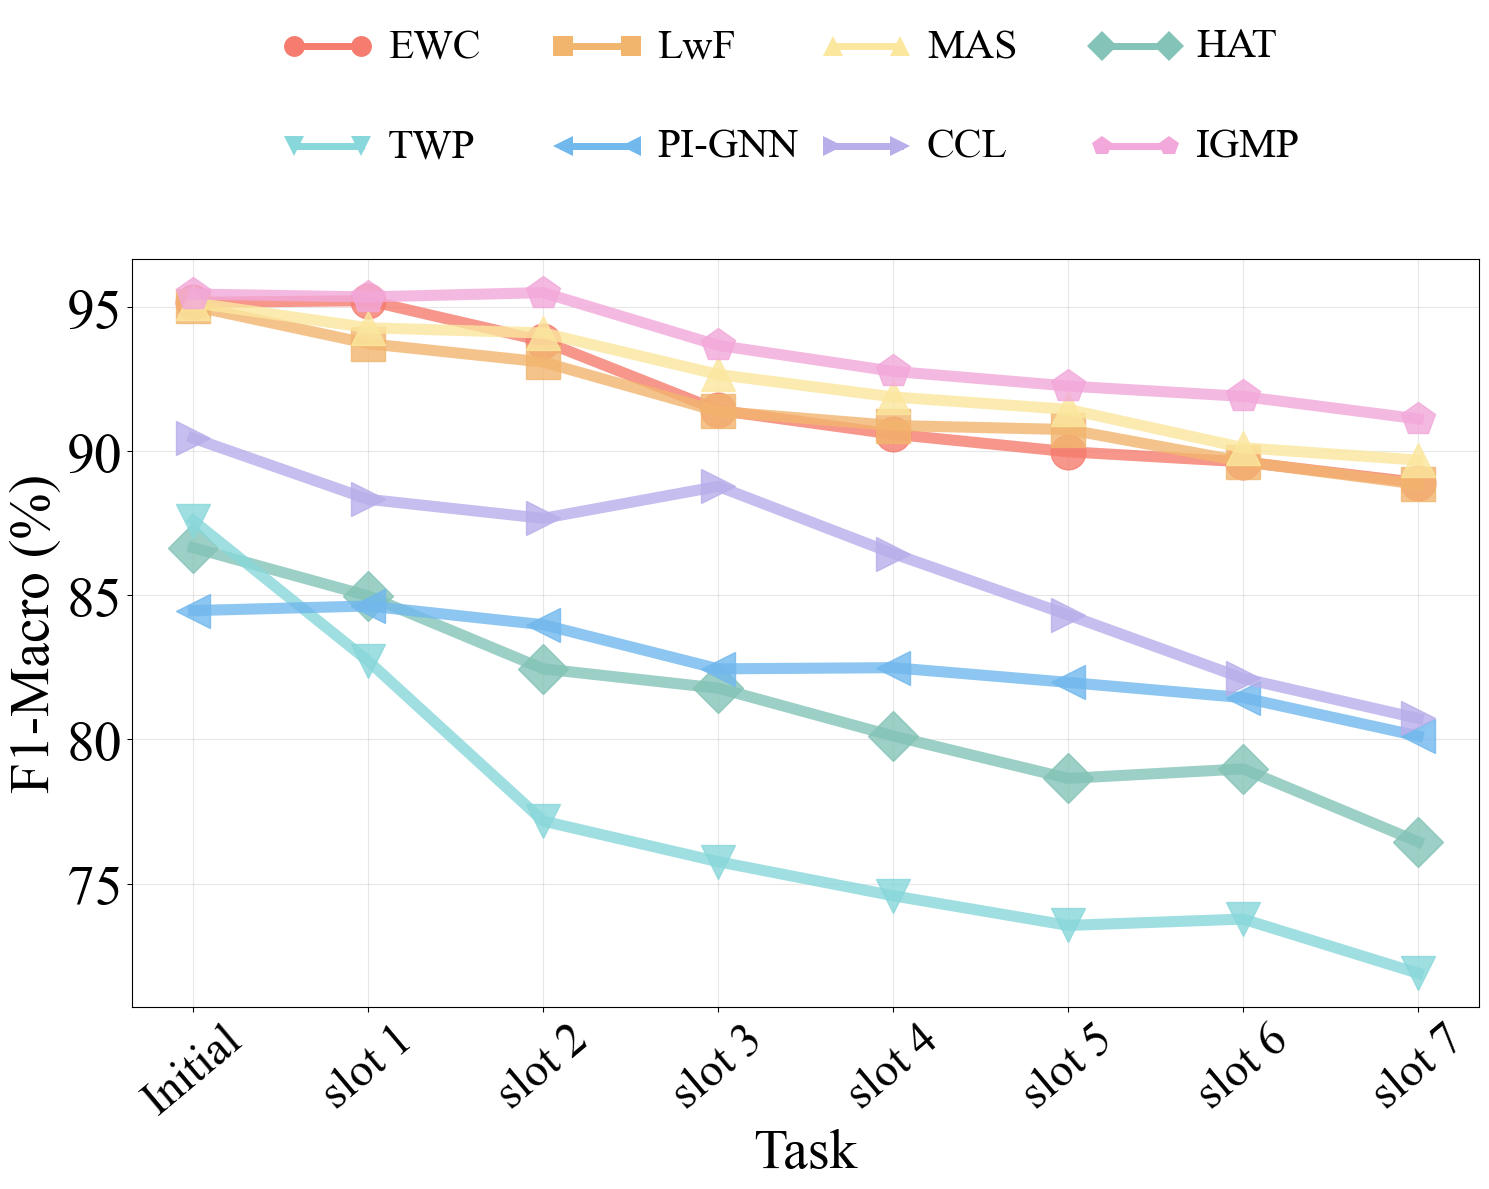

In [6]:
result_f1 = {
    'EWC':[95.16,95.22,93.82,91.42,90.59,89.98,89.63,88.91],
    'LwF':[95.03,93.73,93.09,91.38,90.89,90.75,89.64,88.85],
    'MAS':[95.15,94.28,94.10,92.66,91.88,91.45,90.12,89.69],
    'HAT':[86.65,84.98,82.45,81.78,80.12,78.65,78.98,76.45],
    'TWP':[87.59,82.72,77.17,75.76,74.58,73.55,73.77,71.89],
    'PI-GNN':[84.47,84.63,83.98,82.45,82.49,81.98,81.45,80.12],
    'CCL':[90.45,88.33,87.67,88.78,86.45,84.32,82.12,80.73],
    'IGMP':[95.45,95.35,95.50,93.67,92.77,92.26,91.90,91.12]
}

plot_LineChart(result_f1)

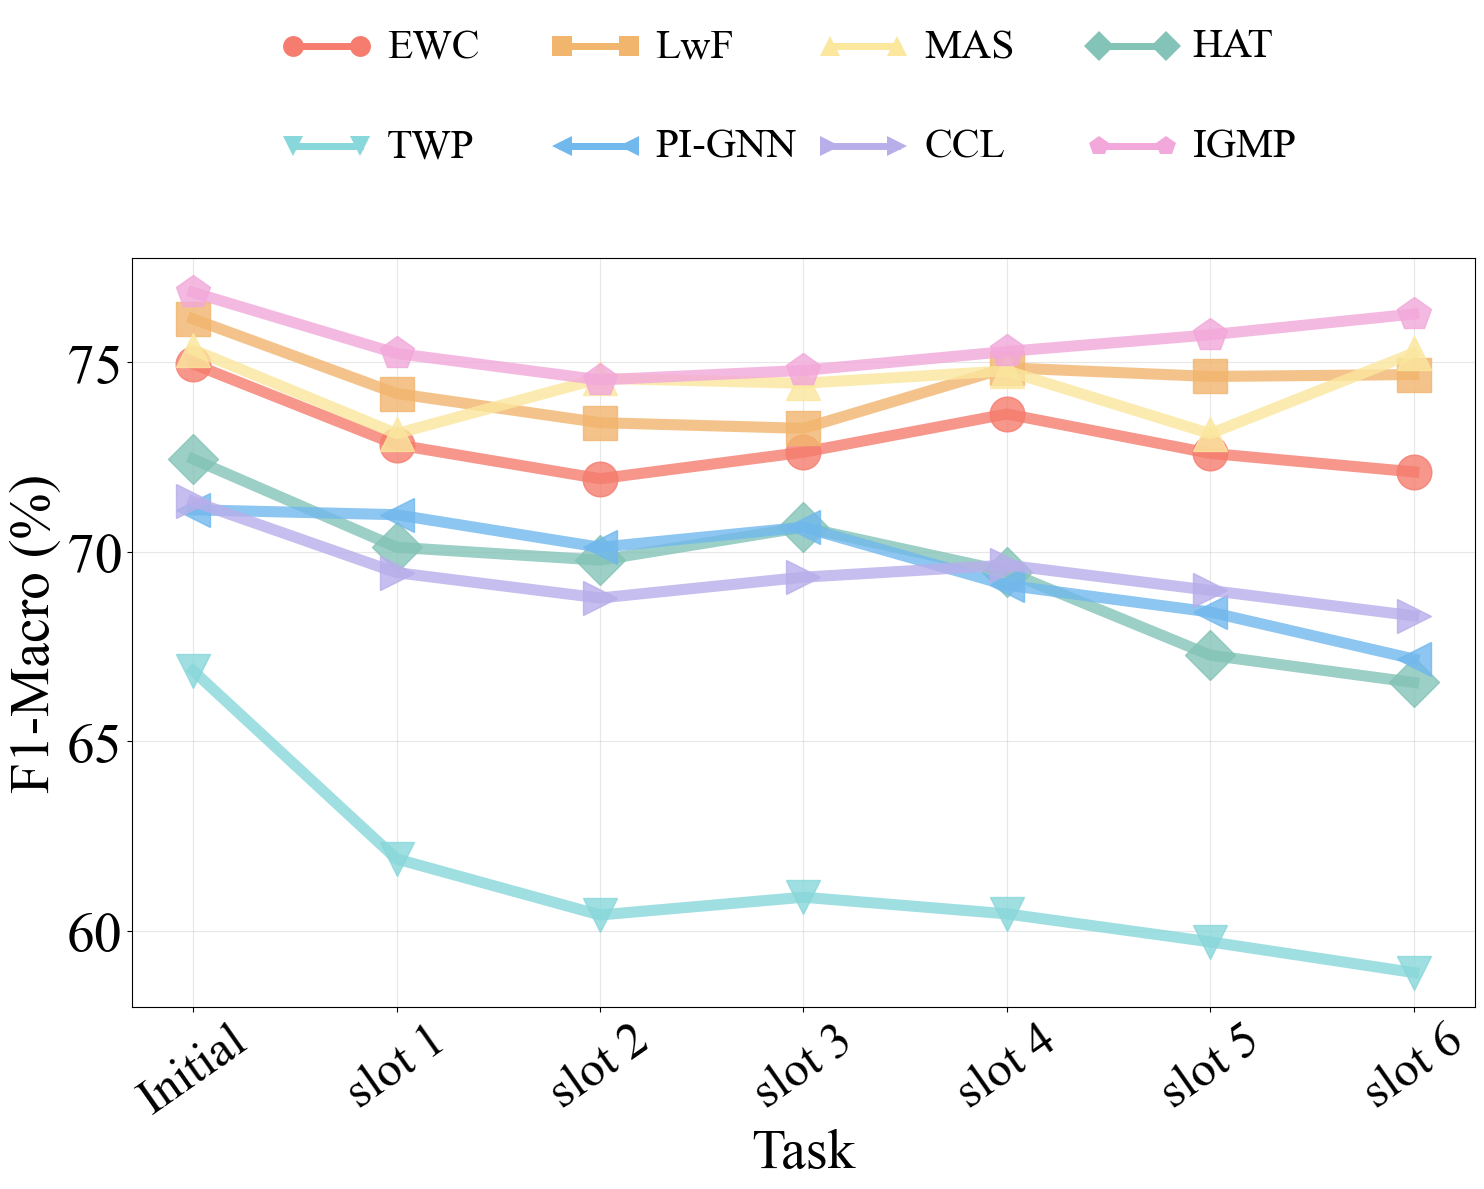

In [7]:
result2_f1 = {
    'EWC':[74.96,72.83,71.93,72.63,73.64,72.60,72.11],
    'LwF':[76.15,74.18,73.41,73.26,74.86,74.63,74.68],
    'MAS':[75.34,73.12,74.58,74.45,74.78,73.12,75.25],
    'HAT':[72.45,70.12,69.78,70.65,69.48,67.27,66.55],
    'TWP':[66.86,61.89,60.41,60.88,60.44,59.70,58.89],
    'PI-GNN':[71.11,70.98,70.12,70.65,69.12,68.41,67.17],
    'CCL':[71.33,69.45,68.78,69.33,69.65,68.98,68.31],
    'IGMP':[76.85,75.24,74.54,74.79,75.29,75.73,76.28]
}
plot_LineChart(result2_f1)

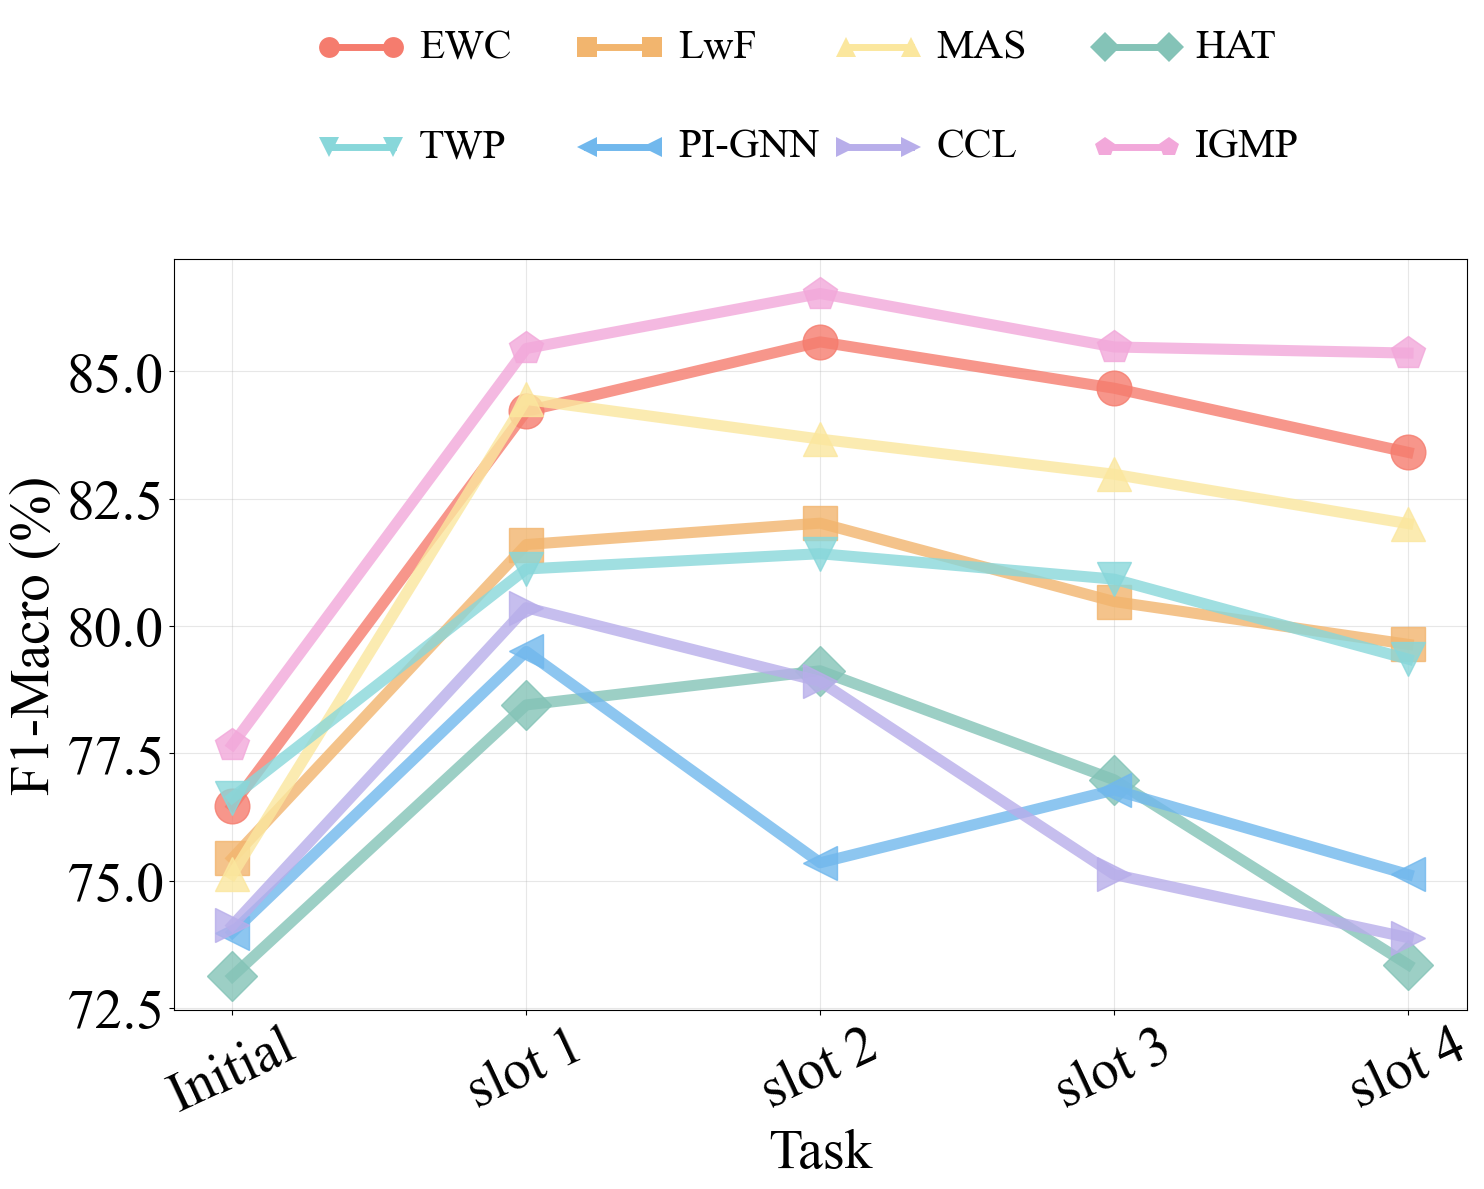

In [8]:
result3_f1 = {
    'EWC':[76.47,84.22,85.58,84.67,83.41],
    'LwF':[75.44,81.60,82.02,80.48,79.64],
    'MAS':[75.12,84.45,83.67,82.98,82.01],
    'HAT':[73.12,78.45,79.12,76.98,73.35],
    'TWP':[76.63,81.12,81.42,80.92,79.35],
    'PI-GNN':[73.98,79.50,75.35,76.78,75.12],
    'CCL':[74.12,80.36,78.91,75.12,73.88],
    'IGMP':[77.67,85.45,86.53,85.48,85.36]
}
plot_LineChart(result3_f1)